Target items (lowest-rated): B08GYM3HVP, B09FKT5PQ9


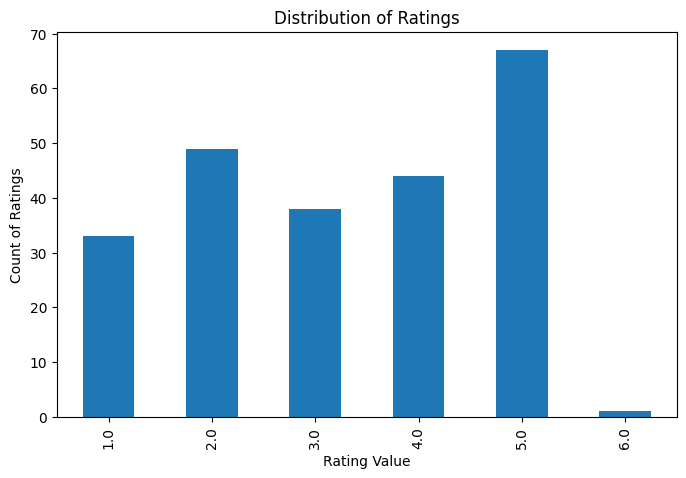


Total Number of Unique Users (Tnu): 100
Total Number of Unique Items (Tni): 10
Ratings per Product: {'B07TDSJZMR': 6, 'B08637FWWF': 9, 'B07KJVGNN5': 96, 'B007HY7GC2': 4, 'B08KYJLF5T': 11, 'B09GBMG83Z': 90, 'B09FKT5PQ9': 3, 'B08THJD1MH': 8, 'B08FCQML37': 3, 'B08GYM3HVP': 2}
Sparsity: 76.80%
Mean Rating: 3.28
Standard Deviation of Rating: 1.45
Target Items (Lowest-Rated): B08GYM3HVP, B09FKT5PQ9

Results saved to text file.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r"g:\mosad hw\recommendcode\user_item_matrix.csv")


Tnu = data['user_id'].nunique()

Tni = data.shape[1] - 1 

ratings_per_item = data.iloc[:, 1:].notna().sum()

lowest_rated_items = ratings_per_item.sort_values().head(2).index

item_11, item_12 = lowest_rated_items[0], lowest_rated_items[1]
print(f"Target items (lowest-rated): {item_11}, {item_12}")

plt.figure(figsize=(8, 5))
data.iloc[:, 1:].stack().value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Count of Ratings')
plt.show()


matrix_size = Tnu * Tni
actual_ratings = data.iloc[:, 1:].notna().sum().sum()
sparsity = 1 - (actual_ratings / matrix_size)

mean_rating = data.iloc[:, 1:].stack().mean()
std_rating = data.iloc[:, 1:].stack().std()

results_text = f"""
Total Number of Unique Users (Tnu): {Tnu}
Total Number of Unique Items (Tni): {Tni}
Ratings per Product: {ratings_per_item.to_dict()}
Sparsity: {sparsity:.2%}
Mean Rating: {mean_rating:.2f}
Standard Deviation of Rating: {std_rating:.2f}
Target Items (Lowest-Rated): {item_11}, {item_12}
"""

with open(r'G:\mosad hw\recommendcode\user_item_matrix_results.txt', 'w') as f:
    f.write(results_text)
print(results_text)

print("Results saved to text file.")


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA


data = pd.read_csv(r"g:\mosad hw\recommendcode\user_item_matrix.csv")

data_filled = data.copy()
for item in data.columns[1:]:
    mean_rating = data[item].mean()  
    data_filled[item].fillna(mean_rating, inplace=True)  


target_items = ['B08GYM3HVP', 'B09FKT5PQ9']

mean_ratings = data_filled[target_items].mean()
print("Average Ratings for Target Items (lowest-rated):")
print(mean_ratings)


centered_data = data_filled.copy()
for item in data.columns[1:]:
    item_mean = data_filled[item].mean()
    centered_data[item] = data_filled[item] - item_mean

cov_matrix = np.cov(centered_data.iloc[:, 1:].T)  
cov_df = pd.DataFrame(cov_matrix, index=data.columns[1:], columns=data.columns[1:])
print("Covariance Matrix:")
print(cov_df)

top_5_peers_item_1 = cov_df[target_items[0]].nlargest(6).index[1:]  
top_10_peers_item_1 = cov_df[target_items[0]].nlargest(11).index[1:]  
top_5_peers_item_2 = cov_df[target_items[1]].nlargest(6).index[1:]  
top_10_peers_item_2 = cov_df[target_items[1]].nlargest(11).index[1:]  


top_5_peers_item_1 = [item for item in top_5_peers_item_1 if item in data_filled.columns]
top_10_peers_item_1 = [item for item in top_10_peers_item_1 if item in data_filled.columns]
top_5_peers_item_2 = [item for item in top_5_peers_item_2 if item in data_filled.columns]
top_10_peers_item_2 = [item for item in top_10_peers_item_2 if item in data_filled.columns]

print(f"Top 5 Peers for Item {target_items[0]}: {top_5_peers_item_1}")
print(f"Top 10 Peers for Item {target_items[0]}: {top_10_peers_item_1}")
print(f"Top 5 Peers for Item {target_items[1]}: {top_5_peers_item_2}")
print(f"Top 10 Peers for Item {target_items[1]}: {top_10_peers_item_2}")

top_5_data = data_filled[top_5_peers_item_1 + top_5_peers_item_2]  
pca = PCA(n_components=5)
reduced_data_5 = pca.fit_transform(top_5_data)

ratings_for_item_1 = data_filled[top_5_peers_item_1].mean(axis=1) 
predicted_rating_item_1 = ratings_for_item_1.mean()  
ratings_for_item_2 = data_filled[top_5_peers_item_2].mean(axis=1)  
predicted_rating_item_2 = ratings_for_item_2.mean()  

print(f"Predicted Rating for Item {target_items[0]} (Top 5 Peers): {predicted_rating_item_1:.2f}")
print(f"Predicted Rating for Item {target_items[1]} (Top 5 Peers): {predicted_rating_item_2:.2f}")

top_10_data = data_filled[top_10_peers_item_1 + top_10_peers_item_2]  
reduced_data_10 = pca.fit_transform(top_10_data)


ratings_for_item_1_top_10 = data_filled[top_10_peers_item_1].mean(axis=1)  #
predicted_rating_item_1_top_10 = ratings_for_item_1_top_10.mean()  
ratings_for_item_2_top_10 = data_filled[top_10_peers_item_2].mean(axis=1)  
predicted_rating_item_2_top_10 = ratings_for_item_2_top_10.mean()  

print(f"Predicted Rating for Item {target_items[0]} (Top 10 Peers): {predicted_rating_item_1_top_10:.2f}")
print(f"Predicted Rating for Item {target_items[1]} (Top 10 Peers): {predicted_rating_item_2_top_10:.2f}")

# 11. Comparison of Predictions
print(f"Comparison of Predictions:")
print(f"Predicted Rating for Item {target_items[0]} (Top 5): {predicted_rating_item_1:.2f}, (Top 10): {predicted_rating_item_1_top_10:.2f}")
print(f"Predicted Rating for Item {target_items[1]} (Top 5): {predicted_rating_item_2:.2f}, (Top 10): {predicted_rating_item_2_top_10:.2f}")


Average Ratings for Target Items (lowest-rated):
B08GYM3HVP    3.5
B09FKT5PQ9    4.0
dtype: float64
Covariance Matrix:
              B07TDSJZMR  B08637FWWF  B07KJVGNN5  B007HY7GC2  B08KYJLF5T  \
B07TDSJZMR  6.902357e-02   -0.031238    0.048822   -0.005051   -0.019896   
B08637FWWF -3.123831e-02    0.204265   -0.050739    0.031145    0.014284   
B07KJVGNN5  4.882155e-02   -0.050739    1.978114   -0.015152    0.027089   
B007HY7GC2 -5.050505e-03    0.031145   -0.015152    0.027778    0.023875   
B08KYJLF5T -1.989593e-02    0.014284    0.027089    0.023875    0.231405   
B09GBMG83Z -3.198653e-02   -0.010101    0.220511   -0.012374   -0.033976   
B09FKT5PQ9 -8.417508e-03    0.025814   -0.030303    0.012626    0.019284   
B08THJD1MH -2.188552e-02   -0.034652   -0.023727   -0.024621   -0.029844   
B08FCQML37  1.467701e-34    0.009353    0.007015    0.000000   -0.018365   
B08GYM3HVP  0.000000e+00    0.000000   -0.010311    0.003788    0.000000   

              B09GBMG83Z  B09FKT5PQ9  B08THJ

C:\Users\mohamed mosad\AppData\Local\Temp\ipykernel_13832\3443453794.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled[item].fillna(mean_rating, inplace=True)  # Replace NaNs with the mean rating


In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r"g:\mosad hw\recommendcode\user_item_matrix.csv")

target_items = ['B08GYM3HVP', 'B09FKT5PQ9']

mean_ratings = data[target_items].mean()
print("Average Ratings for Target Items (I1 and I2):")
print(mean_ratings)

def calculate_mle_covariance(item1, item2):
    
    common_users = data[~data[item1].isna() & ~data[item2].isna()]
    
    if len(common_users) == 0:
        return 0  
    
    ratings_item1 = common_users[item1] - common_users[item1].mean()
    ratings_item2 = common_users[item2] - common_users[item2].mean()
    
    covariance = np.cov(ratings_item1, ratings_item2)[0][1]
    return covariance

cov_matrix = pd.DataFrame(index=data.columns[1:], columns=data.columns[1:])
for item1 in data.columns[1:]:
    for item2 in data.columns[1:]:
        cov_matrix.loc[item1, item2] = calculate_mle_covariance(item1, item2)
cov_matrix = cov_matrix.astype(float)  
print("Covariance Matrix (MLE method):")
print(cov_matrix)

def get_top_peers(cov_matrix, target_item, top_n):
    sorted_peers = cov_matrix[target_item].sort_values(ascending=False)
    top_peers = sorted_peers.index[1:top_n + 1]  
    return top_peers

top_5_peers_item_1 = get_top_peers(cov_matrix, target_items[0], 5)
top_10_peers_item_1 = get_top_peers(cov_matrix, target_items[0], 10)
top_5_peers_item_2 = get_top_peers(cov_matrix, target_items[1], 5)
top_10_peers_item_2 = get_top_peers(cov_matrix, target_items[1], 10)

print(f"Top 5 Peers for Item {target_items[0]}: {top_5_peers_item_1}")
print(f"Top 10 Peers for Item {target_items[0]}: {top_10_peers_item_1}")
print(f"Top 5 Peers for Item {target_items[1]}: {top_5_peers_item_2}")
print(f"Top 10 Peers for Item {target_items[1]}: {top_10_peers_item_2}")

def pca_reduction(data, top_peers):
    top_peers_data = data[top_peers]
    
    imputer = SimpleImputer(strategy='mean')
    top_peers_data_imputed = imputer.fit_transform(top_peers_data)
    
    pca = PCA(n_components=5)
    reduced_data = pca.fit_transform(top_peers_data_imputed)
    return reduced_data

reduced_data_5_item_1 = pca_reduction(data, top_5_peers_item_1)
reduced_data_5_item_2 = pca_reduction(data, top_5_peers_item_2)


Average Ratings for Target Items (I1 and I2):
B08GYM3HVP    3.5
B09FKT5PQ9    4.0
dtype: float64
Covariance Matrix (MLE method):
            B07TDSJZMR  B08637FWWF  B07KJVGNN5  B007HY7GC2  B08KYJLF5T  \
B07TDSJZMR    1.366667   -4.500000    0.966667   -1.500000   -1.166667   
B08637FWWF   -4.500000    2.527778   -0.714286    1.500000    0.000000   
B07KJVGNN5    0.966667   -0.714286    2.061404   -0.500000    0.244444   
B007HY7GC2   -1.500000    1.500000   -0.500000    0.916667    1.000000   
B08KYJLF5T   -1.166667    0.000000    0.244444    1.000000    2.290909   
B09GBMG83Z   -0.633333   -0.125000    0.263201    0.000000   -0.336364   
B09FKT5PQ9         NaN         NaN   -3.000000         NaN         NaN   
B08THJD1MH    0.000000    0.000000   -0.380952    0.000000    0.000000   
B08FCQML37    0.000000         NaN         NaN    0.000000         NaN   
B08GYM3HVP    0.000000    0.000000         NaN         NaN    0.000000   

            B09GBMG83Z  B09FKT5PQ9  B08THJD1MH  B08FCQML

C:\Users\mohamed mosad\AppData\Local\Temp\ipykernel_13832\1600174257.py:29: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(ratings_item1, ratings_item2)[0][1]
c:\Users\mohamed mosad\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mohamed mosad\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
